<h1><center><U>MENTAL HEALTH VALUATION</U></center></h1>

# Importing Libraries

In [123]:
# Importing the libraries
import tensorflow as tf
import keras_tuner as kt
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the Training Dataset

In [2]:
# Importing the data
train_df = pd.read_csv("F://Unified Mentors Internship//Project 4 - Mental Health//playground-series-s4e11//train.csv")
train_df.name = "Mental Health Data"
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",500)

# Dataset pandas view

In [3]:
# dataset
train_df.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

`name` -> not needed

`city`-> categorize into 'others' rest of them and proceed one hot encoding
7,9,10

# EDA

In [5]:
# function to check the sum of unique features in a column
def features_nunique(df):
    print(f"Unique features in {df.name}")
    for i in df.columns:
        print(f"{i} : {df[i].nunique()}")



# function to list all the uniques values
def list_all_uniques(df):
    print(f"Unique features in {df.name}")
    for i in df.columns:
        print(f"{i} : {df[i].unique()}")



# function to list all unique items with number of items
def ls_val_cnt(cser):
    new_a_ls = list(set(cser))
    items=[]
    counts=[]
    for i in range(0,len(new_a_ls)):
        mask = cser == new_a_ls[i]
        items.append(new_a_ls[i])
        counts.append(mask.sum())
        # cser[new_a_ls[3]]
        # print(f"{i} : for the items {new_a_ls[i]} we have {mask.sum()} no.of occurences")
    # converting the new list into a dataframe and sorting its values into descending order.
    new_pd = pd.DataFrame({"items":items,"counts":counts})
    new_pd.sort_values(by='counts',ascending=False,inplace=True)
    return new_pd



# a function to check and remove or replace the unwanted values or rows in a series with user input category
def rm_rpl_ser_items(ls_unwnt, ser, cate_str):
    # Check if inputs are of the correct types
    if isinstance(ls_unwnt, list) and isinstance(ser, pd.Series):
        new_ser = ser.copy()
        # iterating through all items from the unwanted list
        for item in ls_unwnt:
            # checking whether the values exist in the series
            if item in new_ser.values:
                # print(f"{item} is present in the Series")
                # changing the values into "Others"
                new_ser.loc[new_ser == item] = cate_str
                #print("Value changed successfully")
            else:
                print(f"{item} is not present in the Series")
        return new_ser
    else:
        print("The list provided to check is not a list or the series provided is not a Series")

In [6]:
series_city = train_df['City']

In [7]:
# rm_rpl_ser_items(ls_del_citys, series_city)

In [8]:
series_city.unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

In [9]:
a = train_df['Sleep Duration']

# print(new_a_ls)
# print(type(new_a_ls[0]))
# print(f"For {new_a_ls[0]} :  times")

In [10]:
# ls_val_cnt(train_df['Sleep Duration'])

In [11]:
# Number of unique values 
features_nunique(train_df)

Unique features in Mental Health Data
id : 140700
Name : 422
Gender : 2
Age : 43
City : 98
Working Professional or Student : 2
Profession : 64
Academic Pressure : 5
Work Pressure : 5
CGPA : 331
Study Satisfaction : 5
Job Satisfaction : 5
Sleep Duration : 36
Dietary Habits : 23
Degree : 115
Have you ever had suicidal thoughts ? : 2
Work/Study Hours : 13
Financial Stress : 5
Family History of Mental Illness : 2
Depression : 2


These are the columns that we will be taking into consideration
* Gender
* Age
* City
* Working professional or Student
* Profession
* Academic Pressure
* Work Pressure
* CGPA
* Study Satisifaction
* Job Satisfaction
* Sleep Duration 
* Dietary Habits
* Degree
* Have you ever had suicidal thoughts?
* work/study Hours
* Financial Stress
* Family History of Mental Illness

These all will be our Parameters which are to used for testing

* Depression 

this will be our predictor

In [12]:
# function to list all unique features in a dataframe
list_all_uniques(train_df)

Unique features in Mental Health Data
id : [     0      1      2 ... 140697 140698 140699]
Name : ['Aaradhya' 'Vivan' 'Yuvraj' 'Rhea' 'Vani' 'Ritvik' 'Rajveer' 'Aishwarya'
 'Simran' 'Utkarsh' 'Aahana' 'Tejas' 'Aadhya' 'Kiran' 'Aditi' 'Suhani'
 'Jiya' 'Bhavesh' 'Armaan' 'Ishaani' 'Prachi' 'Pratyush' 'Abhinav'
 'Siddhesh' 'Aditya' 'Aarav' 'Asha' 'Kashish' 'Prisha' 'Chhavi' 'Tanmay'
 'Vihaan' 'Shiv' 'Anvi' 'Darsh' 'Samar' 'Raunak' 'Mahi' 'Shaurya' 'Vidya'
 'Jai' 'Ayush' 'Ansh' 'Anand' 'Yashvi' 'Shrey' 'Ritika' 'Mihir' 'Isha'
 'Arjun' 'Rohan' 'Pratham' 'Nirvaan' 'Ishaan' 'Aarya' 'Riya' 'Aariv'
 'Raghavendra' 'Mahika' 'Abhishek' 'Harshil' 'Janvi' 'Kartikeya' 'Shivam'
 'Advait' 'Reyansh' 'Saanvi' 'Ivaan' 'Pallavi' 'Sneha' 'Ayaan' 'Aakash'
 'Raghav' 'Satyam' 'Aarush' 'Vibha' 'Rupal' 'Sanya' 'Mira' 'Rashi' 'Shlok'
 'Harsha' 'Divya' 'Pranav' 'Hrithik' 'Tushar' 'Garima' 'Zoya' 'Kian'
 'Navya' 'Lakshay' 'Kriti' 'Palak' 'Aryan' 'Parth' 'Ishan' 'Rupak'
 'Atharv' 'Aarti' 'Anirudh' 'Kabir' 'Sanjeev' 

Work/Study Hours : [ 1.  7.  3. 10.  9.  6.  8.  2.  0.  5. 12.  4. 11.]
Financial Stress : [ 2.  3.  1.  4.  5. nan]
Family History of Mental Illness : ['No' 'Yes']
Depression : [0 1]


it seems that the datas are jumbled inbetween each other some columns store values of another column and other column store values of some another columns. so i'm guessing it is gonna be a headache to clean this data.

## Column Names

In [13]:
train_df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

### Name Col

Lets assess this issue each column

In [14]:
train_df['Name'].unique()

array(['Aaradhya', 'Vivan', 'Yuvraj', 'Rhea', 'Vani', 'Ritvik', 'Rajveer',
       'Aishwarya', 'Simran', 'Utkarsh', 'Aahana', 'Tejas', 'Aadhya',
       'Kiran', 'Aditi', 'Suhani', 'Jiya', 'Bhavesh', 'Armaan', 'Ishaani',
       'Prachi', 'Pratyush', 'Abhinav', 'Siddhesh', 'Aditya', 'Aarav',
       'Asha', 'Kashish', 'Prisha', 'Chhavi', 'Tanmay', 'Vihaan', 'Shiv',
       'Anvi', 'Darsh', 'Samar', 'Raunak', 'Mahi', 'Shaurya', 'Vidya',
       'Jai', 'Ayush', 'Ansh', 'Anand', 'Yashvi', 'Shrey', 'Ritika',
       'Mihir', 'Isha', 'Arjun', 'Rohan', 'Pratham', 'Nirvaan', 'Ishaan',
       'Aarya', 'Riya', 'Aariv', 'Raghavendra', 'Mahika', 'Abhishek',
       'Harshil', 'Janvi', 'Kartikeya', 'Shivam', 'Advait', 'Reyansh',
       'Saanvi', 'Ivaan', 'Pallavi', 'Sneha', 'Ayaan', 'Aakash', 'Raghav',
       'Satyam', 'Aarush', 'Vibha', 'Rupal', 'Sanya', 'Mira', 'Rashi',
       'Shlok', 'Harsha', 'Divya', 'Pranav', 'Hrithik', 'Tushar',
       'Garima', 'Zoya', 'Kian', 'Navya', 'Lakshay', 'Kriti', 'Palak

We can see `M.Tech` and `UX/UI Designer` in the `name` column which we can clearly understand that it does not belong to the category

### Working Profession or student Col

In [15]:
ls_val_cnt(train_df['Working Professional or Student'])

,items,counts
1,Working Professional,112799
0,Student,27901


In `Gender` column we can see that there was no other values other than `male` or `female`

### City Col

In [16]:
# city columns
train_df['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

In [17]:
# unique list assigning for new function ls_del_item
print(ls_val_cnt(train_df['City']))
controlling_city_col = ls_val_cnt(train_df['City'])

                 items  counts
65              Kalyan    6591
77               Patna    5924
90         Vasai-Virar    5765
2              Kolkata    5689
4            Ahmedabad    5613
0               Meerut    5528
57            Ludhiana    5226
79                Pune    5210
50              Rajkot    5207
5        Visakhapatnam    5176
13            Srinagar    5074
8               Mumbai    4966
38              Indore    4872
62                Agra    4684
34               Surat    4636
12            Varanasi    4606
35            Vadodara    4568
66           Hyderabad    4496
54              Kanpur    4398
76              Jaipur    4328
71               Thane    4289
46             Lucknow    4280
33              Nagpur    4209
55           Bangalore    4123
6              Chennai    4044
23           Ghaziabad    3620
47               Delhi    3593
43              Bhopal    3475
28           Faridabad    3268
36              Nashik    3144
56               Mihir       7
37      

In [18]:
ls_del_citys = list(controlling_city_col[controlling_city_col['counts']<10]['items'])
ls_del_citys

['Mihir',
 'Nandini',
 'Bhavna',
 'City',
 'Saanvi',
 'Harsha',
 'Mahi',
 'Pratyush',
 'Vidya',
 'Molkata',
 'MCA',
 'Atharv',
 'Nalini',
 'Keshav',
 'Ayush',
 'M.Com',
 'Ithal',
 'Reyansh',
 'Anvi',
 'Raghavendra',
 'MSc',
 'Parth',
 'Less than 5 Kalyan',
 'Pooja',
 'Khaziabad',
 'Galesabad',
 'Vaanya',
 'Khushi',
 'Aditya',
 'Gaurav',
 'Kibara',
 'Itheg',
 'No',
 'Moreadhyay',
 'ME',
 'Aaradhya',
 '3.0',
 'Krinda',
 'Chhavi',
 'Mira',
 'Ishkarsh',
 'Shrey',
 'Ayansh',
 'Malyansh',
 'Vidhi',
 'Ishanabad',
 'Unirar',
 'Ivaan',
 'Jhanvi',
 'Nalyan',
 'Vaishnavi',
 'Kashish',
 'Krishna',
 'Aishwarya',
 'Gurgaon',
 'Rashi',
 'M.Tech',
 'Kashk',
 'Morena',
 'Harsh',
 'Tushar',
 'Less Delhi',
 'Researcher',
 'Dhruv',
 'Plata',
 'Tolkata',
 'Armaan',
 'Kagan']

In [19]:
# Check if all elements in ls_del_citys are in train_df['City']
if all(item in train_df['City'].values for item in ls_del_citys):
    print(True)
else:
    print(False)

True


In [20]:
# we have the items to delete here 
# and the series which we want to put the change to 
# and we will assign it into a new variable
other = 'Others'
filtered_city_col = rm_rpl_ser_items(ls_del_citys, train_df['City'], other)

#check if what we have done is correct or not
filtered_city_col.value_counts()


City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3620
Delhi            3593
Bhopal           3475
Faridabad        3268
Nashik           3144
Others             98
Name: count, dtype: int64

In [21]:
filtered_city_col

0              Ludhiana
1              Varanasi
2         Visakhapatnam
3                Mumbai
4                Kanpur
              ...      
140695        Ahmedabad
140696        Hyderabad
140697          Kolkata
140698         Srinagar
140699            Patna
Name: City, Length: 140700, dtype: object

In [22]:
train_df['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

 here in the `City` column we can see that the data stored here are `City`, `3.0`, `Less than 5 Kalyan`, `MCA`

In the `Working Professional or Student` column there are only 2 values , so we dont have to change anything there

### Profession Col

In [23]:
train_df['Profession'].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

In [24]:
# unique list
ls_val_cnt(train_df['Profession'])

,items,counts
19,Teacher,24906
12,Content Writer,7814
31,Architect,4370
38,Consultant,4229
49,HR Manager,4022
47,Pharmacist,3893
33,Doctor,3255
10,Business Analyst,3161
11,Entrepreneur,2968
35,Chemist,2967


From the above uniqueness of the data we can actually divide the extra uniqueness into 2 categories one for `Students` and another for `Other`

Here in the `profession` column we can see that datas from the `name`,`degree`,`working professional` columns are present

the columns `Academic Pressure`,`Work Pressure`, `CGPA`, `Study Satisfaction`,`Job Satisfaction` are comfortable to work with because these columns does not have datas from other columns

In [25]:
# these are all the list that we are going to categorize
ls_other_profession = ['Yuvraj','Moderate','Unveil','Nagpur','Dev','Pranav','Patna','Working Professional',
                       'Visakhapatnam','Profession','Unemployed','Yogesh']
ls_stu_profession = ['B.Ed','BBA','B.Com','MBBS','M.Ed','BE','PhD','MBA','LLM','BCA','Academic']

In [26]:
# if all the items in the list ls_stu_profession is found in the series column train_df['Profession']
# then make all the values present in the ls_stu_profession into the student category

student = 'Student'
hf_filtered_profession_col = rm_rpl_ser_items(ls_stu_profession, train_df['Profession'], student)

#check if what we have done is correct or not
print(hf_filtered_profession_col.value_counts())

type(hf_filtered_profession_col)

Profession
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 1339
Finanancial Analyst        13

pandas.core.series.Series

In [27]:
# if all the items in the list ls_stu_profession is found in the series column train_df['Profession']
# then make all the values present in the ls_other_profession into the other category

filtered_profession_col = rm_rpl_ser_items(ls_other_profession, hf_filtered_profession_col , other)

#check if what we have done is correct or not
print(filtered_profession_col.value_counts())

type(filtered_profession_col)

Profession
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Data Scientist             2390
Researcher                 2328
Lawyer                     2212
Customer Support           2055
Marketing Manager          1976
Pilot                      1913
Travel Consultant          1860
Plumber                    1748
Sales Executive            1739
Manager                    1737
Judge                      1712
Electrician                1582
Financial Analyst          1574
Software Engineer          1510
Civil Engineer             1470
UX/UI Designer             1452
Digital Marketer           1372
Accountant                 1339
Finanancial Analyst        13

pandas.core.series.Series

### Sleep Duration Col

In [28]:
# now in column 'Sleep Duration' 
train_df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [29]:
# unique list
sleep_duration = ls_val_cnt(train_df['Sleep Duration'])
sleep_duration

,items,counts
6,Less than 5 hours,38784
9,7-8 hours,36969
21,More than 8 hours,32726
27,5-6 hours,32142
5,3-4 hours,12
29,6-7 hours,8
28,4-5 hours,7
20,2-3 hours,5
17,4-6 hours,5
35,6-8 hours,4


Here you can see that datas like `unhealthy`,`work_Study_hours`, `Pune`|`Indore`, `Sleep Duration` are some of the datas that are actually no required in this particular column

In [30]:
# sleep duration categories
ls_others_sleep_duration = ['No','Sleep_Duration','Unhealthy','45','Work_Study_Hours','40-45 hours','Moderate','35-36 hours',
                            '49 hours','than 5 hours','55-66 hours','45-48 hours','Pune','Indore']

less_than_5hrs = ['1-2 hours','3-6 hours','3-4 hours','4-5 hours','4-6 hours','2-3 hours','1-3 hours','1-6 hours']
ls_bw_5_9_hrs = ['5-6 hours','6-7 hours','6-8 hours','8 hours','7-8 hours','9-6 hours','9-5 hours','8-9 hours','9-5']
more_than_9_hrs = ['10-6 hours','More than 8 hours','9-11 hours','10-11 hours']

In [31]:
# others category
others_filtered = rm_rpl_ser_items(ls_others_sleep_duration , train_df['Sleep Duration'], other)

# less than 5 hours category
ls_5hrs = "Less than 5 hours"
less_than_5hrs_filtered = rm_rpl_ser_items(less_than_5hrs, others_filtered, ls_5hrs)

# between 5 and 9 hours
bw_5_9_hrs = "Between 5 - 9 Hours"
bw_5_9 = rm_rpl_ser_items(ls_bw_5_9_hrs, less_than_5hrs_filtered, bw_5_9_hrs)

# more than 9 hours
morethan_9 = "More than 8 hours"
more_than_9 = rm_rpl_ser_items(more_than_9_hrs, bw_5_9, morethan_9)

# assigning it to a new variable 
filtered_sleep_duration_col = more_than_9

filtered_sleep_duration_col.value_counts()

Sleep Duration
Between 5 - 9 Hours    69129
Less than 5 hours      38820
More than 8 hours      32731
Others                    20
Name: count, dtype: int64

### Dietary Habits Col

In [32]:
# in column 'Dietary Habits'
train_df['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [33]:
# unique list
ls_val_cnt(train_df['Dietary Habits'])

,items,counts
6,Moderate,49705
12,Unhealthy,46227
5,Healthy,44741
20,Yes,2
8,No,2
16,More Healthy,2
14,No Healthy,1
22,Pratham,1
21,Indoor,1
19,Less than Healthy,1


Even here we can see that the datas from other columns are also present here like say for example `Indoor` from `City` column, `M.Tech` from `Degree` column, `Electrician` from `Profession` column and so on.

In [34]:
# categorizing the deitary habits column
ls_other_diet = ['Yes','No','Male','Class 12','Gender','1.0','M.Tech','Mihir','BSc',
                 'Electrician','2','3','Indoor','Vegas','Hormonal', 'Pratham']

ls_healthy = ['More Healthy','Healthy',]
ls_moderate = ['Moderate','No Healthy','Less than Healthy']
ls_unhealthy = ['Unhealthy','Less Healthy']

In [35]:
# filtering the dietary habit column
other_filtered = rm_rpl_ser_items(ls_other_diet, train_df['Dietary Habits'], other)

# healthy
healthy = 'Healthy'
healthy_filtered = rm_rpl_ser_items(ls_healthy, other_filtered, healthy)

# unhealthy
unhealthy = 'Unhealthy'
unhealthy_filtered = rm_rpl_ser_items(ls_unhealthy, healthy_filtered, unhealthy)

# moderate
mod = 'Moderate'
filtered_diet_col = rm_rpl_ser_items(ls_moderate, unhealthy_filtered, mod)

# value counts of it
filtered_diet_col.value_counts()

Dietary Habits
Moderate     49707
Unhealthy    46228
Healthy      44743
Others          18
Name: count, dtype: int64

### Degree Col

In [36]:
# in the column degree lets see what all kinds of unique values are available there
train_df['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [37]:
# unique list
controlling_degree_col = ls_val_cnt(train_df['Degree'])
controlling_degree_col

,items,counts
97,Class 12,14729
99,B.Ed,11691
76,B.Arch,8742
58,B.Com,8113
98,B.Pharm,5856
110,BCA,5739
106,M.Ed,5668
53,MCA,5234
70,BBA,5030
35,BSc,5027


We can see that there are other columns datas like `Working Professional`,`Esha`,`Pihu`,`Doctor`,`B.3.79` ... are the categories present in other columns like `Working Professional or Student`, `Name`, `Profession` ..

the rest of the columns have very uniques values and belongs to that particular columns only `Have you ever had suicidal thoughts ?`, `Work/Study Hours`,
       `Financial Stress`, `Family History of Mental Illness`

In [38]:
ls_degree_others_col = list(controlling_degree_col[controlling_degree_col['counts']<5]['items'])
ls_degree_others_col[-1] = str(float(0))
ls_degree_others_col.remove('0.0')
ls_degree_others_col


['UX/UI Designer',
 'M',
 'Kalyan',
 'B.Sc',
 'B',
 'BEd',
 'MEd',
 'LLBA',
 'BPharm',
 'Degree',
 'BArch',
 'Nalini',
 'Jhanvi',
 'L.Ed',
 'P.Com',
 'LL B.Ed',
 'Bhopal',
 'S.Arch',
 'Mahika',
 'Veda',
 'Mihir',
 'Badhya',
 'Esha',
 '8.56',
 '29',
 'LLS',
 'S.Pharm',
 'LLCom',
 'Brithika',
 'MPharm',
 'S.Tech',
 'B B.Com',
 'Advait',
 '5.56',
 'BPA',
 'P.Pharm',
 'H_Pharm',
 'Ritik',
 'B.B.Arch',
 'Mthanya',
 'Navya',
 'B BA',
 'CGPA',
 'M.S',
 'LCA',
 '7.06',
 'B.Student',
 'ACA',
 'N.Pharm',
 'Lata',
 'Aarav',
 'RCA',
 '0',
 '5.61',
 '5.88',
 'E.Tech',
 'Class 11',
 'Doctor',
 'M. Business Analyst',
 'LLTech',
 'Working Professional',
 '20',
 'Plumber',
 'Entrepreneur',
 'Vivaan',
 'M_Tech',
 'LHM',
 'Marsh',
 'LLEd',
 '24',
 'B.3.79',
 'Bhavesh',
 'B.03',
 'Pihu',
 'HR Manager',
 'K.Ed',
 'MTech',
 'HCA',
 'Vrinda',
 'Unite',
 'Brit',
 'LL.Com',
 'Data Scientist',
 'MPA',
 'BB',
 'Business Analyst',
 'BH']

In [39]:
filtered_degree_col = rm_rpl_ser_items(ls_degree_others_col, train_df['Degree'], other)
filtered_degree_col.value_counts()

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5739
M.Ed         5668
MCA          5234
BBA          5030
BSc          5027
MSc          4879
LLM          4647
M.Pharm      4537
M.Tech       4475
B.Tech       4425
LLB          4348
BHM          4305
MBA          3818
BA           3750
ME           3632
MD           3383
MHM          3286
BE           3104
PhD          3103
M.Com        3094
MBBS         3082
MA           2887
Others        109
M.Arch          5
Name: count, dtype: int64

### Finalizing the final dataset

In [40]:
# new dataset after cleaning the dataset
new_df = {"Gender":train_df['Gender'].values,
          "Age":train_df['Age'].values,
          "City":filtered_city_col,
          "Worker Professional/Student":train_df['Working Professional or Student'].values,
          "Profession":filtered_profession_col,
          "Academic Pressure":train_df['Academic Pressure'].values,
          "Work Pressure":train_df['Work Pressure'].values,
          "CGPA":train_df['CGPA'].values,
          "Study Satisifaction":train_df['Study Satisfaction'].values,
          "Job Satisfaction":train_df['Job Satisfaction'].values,
          "Sleep Duration":filtered_sleep_duration_col,
          "Dietary Habits":filtered_diet_col,
          "Degree":filtered_degree_col,
          "Suicidal Thoughts?":train_df['Have you ever had suicidal thoughts ?'].values,
          "work/study Hours":train_df['Work/Study Hours'].values,
          "Financial Stress":train_df['Financial Stress'].values,
          "Heritage Illness":train_df['Family History of Mental Illness'].values,
          "Depression":train_df['Depression']}

new_df = pd.DataFrame(new_df)
new_df.name = "Cleaned Mental Health Data"

In [41]:
new_df.head(5)

,Gender,Age,City,Worker Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisifaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts?,work/study Hours,Financial Stress,Heritage Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,Between 5 - 9 Hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,Between 5 - 9 Hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## Filling All NULL Values with Zero

In [42]:
# Lets fill all the null values with zero
new_df.fillna(0,inplace=True)

In [43]:
new_df.head(5)

,Gender,Age,City,Worker Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisifaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts?,work/study Hours,Financial Stress,Heritage Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,0,5.0,0.0,8.97,2.0,0.0,Between 5 - 9 Hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.00,0.0,1.0,Between 5 - 9 Hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


### Again showing the uniqueness to check everything is allright

In [44]:
features_nunique(new_df)

Unique features in Cleaned Mental Health Data
Gender : 2
Age : 43
City : 31
Worker Professional/Student : 2
Profession : 43
Academic Pressure : 6
Work Pressure : 6
CGPA : 332
Study Satisifaction : 6
Job Satisfaction : 6
Sleep Duration : 4
Dietary Habits : 5
Degree : 30
Suicidal Thoughts? : 2
work/study Hours : 13
Financial Stress : 6
Heritage Illness : 2
Depression : 2


In [45]:
list_all_uniques(new_df)

Unique features in Cleaned Mental Health Data
Gender : ['Female' 'Male']
Age : [49. 26. 33. 22. 30. 59. 47. 38. 24. 42. 55. 51. 39. 29. 50. 23. 56. 45.
 37. 46. 31. 19. 28. 25. 41. 60. 18. 36. 21. 58. 44. 43. 40. 35. 54. 27.
 52. 48. 57. 53. 34. 20. 32.]
City : ['Ludhiana' 'Varanasi' 'Visakhapatnam' 'Mumbai' 'Kanpur' 'Ahmedabad'
 'Thane' 'Nashik' 'Bangalore' 'Patna' 'Rajkot' 'Jaipur' 'Pune' 'Lucknow'
 'Meerut' 'Agra' 'Surat' 'Faridabad' 'Hyderabad' 'Srinagar' 'Ghaziabad'
 'Kolkata' 'Chennai' 'Kalyan' 'Nagpur' 'Vadodara' 'Vasai-Virar' 'Delhi'
 'Bhopal' 'Indore' 'Others']
Worker Professional/Student : ['Working Professional' 'Student']
Profession : ['Chef' 'Teacher' 0 'Business Analyst' 'Finanancial Analyst' 'Chemist'
 'Electrician' 'Software Engineer' 'Data Scientist' 'Plumber'
 'Marketing Manager' 'Accountant' 'Entrepreneur' 'HR Manager'
 'UX/UI Designer' 'Content Writer' 'Educational Consultant'
 'Civil Engineer' 'Manager' 'Pharmacist' 'Financial Analyst' 'Architect'
 'Mechanical Engi

In [46]:
new_df.tail(10)

,Gender,Age,City,Worker Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisifaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts?,work/study Hours,Financial Stress,Heritage Illness,Depression
140690,Female,18.0,Ludhiana,Student,0,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
140691,Female,57.0,Meerut,Working Professional,Teacher,0.0,1.0,0.00,0.0,1.0,Less than 5 hours,Moderate,B.Arch,Yes,4.0,5.0,Yes,0
140692,Male,49.0,Bhopal,Working Professional,Financial Analyst,0.0,4.0,0.00,0.0,1.0,Between 5 - 9 Hours,Moderate,MBA,No,9.0,1.0,No,0
140693,Male,55.0,Srinagar,Working Professional,Data Scientist,0.0,1.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,M.Tech,No,9.0,2.0,No,0
140694,Female,45.0,Ahmedabad,Working Professional,Teacher,0.0,2.0,0.00,0.0,5.0,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,0
140695,Female,18.0,Ahmedabad,Working Professional,0,0.0,5.0,0.00,0.0,4.0,Between 5 - 9 Hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,Female,41.0,Hyderabad,Working Professional,Content Writer,0.0,5.0,0.00,0.0,4.0,Between 5 - 9 Hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,Female,24.0,Kolkata,Working Professional,Marketing Manager,0.0,3.0,0.00,0.0,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,Female,49.0,Srinagar,Working Professional,Plumber,0.0,5.0,0.00,0.0,2.0,Between 5 - 9 Hours,Moderate,ME,Yes,10.0,1.0,No,0
140699,Male,27.0,Patna,Student,0,4.0,0.0,9.24,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


### Duplicated

Now lets find if there is any duplicates in the new dataframe

In [47]:
new_df.duplicated().sum()

8

As you can see there are 8 duplicate field avialble here so we will drop them 

In [48]:
new_df.drop_duplicates(inplace=True)

we Will check the dupllicates again if it really have dropped or not

In [49]:
new_df.duplicated().sum()

0

# Categorizing the Data

In [50]:
new_df.head(5)

,Gender,Age,City,Worker Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisifaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts?,work/study Hours,Financial Stress,Heritage Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,0,5.0,0.0,8.97,2.0,0.0,Between 5 - 9 Hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.00,0.0,1.0,Between 5 - 9 Hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## Label Encoding the Column Features

 ### Gender Column

In [51]:
new_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [52]:
# Custom naming the gender column
gender = {'Female':0,'Male':1}
new_df['Gender'] = new_df['Gender'].map(gender)
new_df['Gender'].unique()

array([0, 1], dtype=int64)

### Age Column

In [53]:
new_df['Age'].unique()

array([49., 26., 33., 22., 30., 59., 47., 38., 24., 42., 55., 51., 39.,
       29., 50., 23., 56., 45., 37., 46., 31., 19., 28., 25., 41., 60.,
       18., 36., 21., 58., 44., 43., 40., 35., 54., 27., 52., 48., 57.,
       53., 34., 20., 32.])

I think I'll standardize/normlaize the `Age` column, because i think though they are given they might negatively affect my data.

### City Column

In [54]:
new_df['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Others'], dtype=object)

In [55]:
City = list(new_df['City'].unique())
print(City)

['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur', 'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat', 'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata', 'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi', 'Bhopal', 'Indore', 'Others']


In [56]:
city_no = np.arange(0,len(City))
city_no

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [57]:
city_encoder = {}
for i,j in zip(City,city_no):
    city_encoder[i]=j
city_encoder


{'Ludhiana': 0,
 'Varanasi': 1,
 'Visakhapatnam': 2,
 'Mumbai': 3,
 'Kanpur': 4,
 'Ahmedabad': 5,
 'Thane': 6,
 'Nashik': 7,
 'Bangalore': 8,
 'Patna': 9,
 'Rajkot': 10,
 'Jaipur': 11,
 'Pune': 12,
 'Lucknow': 13,
 'Meerut': 14,
 'Agra': 15,
 'Surat': 16,
 'Faridabad': 17,
 'Hyderabad': 18,
 'Srinagar': 19,
 'Ghaziabad': 20,
 'Kolkata': 21,
 'Chennai': 22,
 'Kalyan': 23,
 'Nagpur': 24,
 'Vadodara': 25,
 'Vasai-Virar': 26,
 'Delhi': 27,
 'Bhopal': 28,
 'Indore': 29,
 'Others': 30}

In [58]:
new_df['City'] = new_df['City'].map(city_encoder)
new_df['City']

0          0
1          1
2          2
3          3
4          4
          ..
140695     5
140696    18
140697    21
140698    19
140699     9
Name: City, Length: 140692, dtype: int32

### Working Professional or Student Column

In [59]:
new_df['Worker Professional/Student'] = LabelEncoder().fit_transform(new_df['Worker Professional/Student'])
new_df['Worker Professional/Student']

0         1
1         1
2         0
3         1
4         1
         ..
140695    1
140696    1
140697    1
140698    1
140699    0
Name: Worker Professional/Student, Length: 140692, dtype: int32

### Profession Column

In [60]:
profession = list(new_df['Profession'].unique())
print(len(profession))

43


In [61]:
profession_no = np.arange(0,len(profession))
profession_no

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [62]:
profession_dict = {}
for i , j in zip(profession, profession_no):
    profession_dict[i]=j
profession_dict

{'Chef': 0,
 'Teacher': 1,
 0: 2,
 'Business Analyst': 3,
 'Finanancial Analyst': 4,
 'Chemist': 5,
 'Electrician': 6,
 'Software Engineer': 7,
 'Data Scientist': 8,
 'Plumber': 9,
 'Marketing Manager': 10,
 'Accountant': 11,
 'Entrepreneur': 12,
 'HR Manager': 13,
 'UX/UI Designer': 14,
 'Content Writer': 15,
 'Educational Consultant': 16,
 'Civil Engineer': 17,
 'Manager': 18,
 'Pharmacist': 19,
 'Financial Analyst': 20,
 'Architect': 21,
 'Mechanical Engineer': 22,
 'Customer Support': 23,
 'Consultant': 24,
 'Judge': 25,
 'Researcher': 26,
 'Pilot': 27,
 'Graphic Designer': 28,
 'Travel Consultant': 29,
 'Digital Marketer': 30,
 'Lawyer': 31,
 'Research Analyst': 32,
 'Sales Executive': 33,
 'Doctor': 34,
 'Others': 35,
 'Investment Banker': 36,
 'Family Consultant': 37,
 'Student': 38,
 'FamilyVirar': 39,
 'City Manager': 40,
 'Medical Doctor': 41,
 'Analyst': 42}

In [63]:
new_df['Profession'] = new_df['Profession'].map(profession_dict)
new_df['Profession']

0          0
1          1
2          2
3          1
4          3
          ..
140695     2
140696    15
140697    10
140698     9
140699     2
Name: Profession, Length: 140692, dtype: int32

### Sleep Duration Column

In [64]:
new_df['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', 'Between 5 - 9 Hours',
       'Others'], dtype=object)

In [65]:
new_df['Sleep Duration'].value_counts()

Sleep Duration
Between 5 - 9 Hours    69123
Less than 5 hours      38818
More than 8 hours      32731
Others                    20
Name: count, dtype: int64

Now when i think about it i feel like i dont have the use of others category particularly so i think i'll drop it

In [66]:
conditionfor_sleep_duration = new_df[new_df['Sleep Duration'].isin(['Others'])].index
conditionfor_sleep_duration

Index([  4021,  19915,  27865,  29050,  35953,  45218,  50817,  61185,  66929,
        68239,  72700,  75587,  76261,  79764,  80918,  85727,  94888, 121412,
       123519, 132759],
      dtype='int64')

In [67]:
new_df.drop(conditionfor_sleep_duration, axis=0, inplace=True)

In [68]:
new_df.count()

Gender                         140672
Age                            140672
City                           140672
Worker Professional/Student    140672
Profession                     140672
Academic Pressure              140672
Work Pressure                  140672
CGPA                           140672
Study Satisifaction            140672
Job Satisfaction               140672
Sleep Duration                 140672
Dietary Habits                 140672
Degree                         140672
Suicidal Thoughts?             140672
work/study Hours               140672
Financial Stress               140672
Heritage Illness               140672
Depression                     140672
dtype: int64

In [69]:
sleep_duration_dict = {'Less than 5 hours':0,'Between 5 - 9 Hours':1, 'More than 8 hours': 2}

new_df['Sleep Duration'] = new_df['Sleep Duration'].map(sleep_duration_dict)

In [70]:
new_df.head(5)

,Gender,Age,City,Worker Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisifaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts?,work/study Hours,Financial Stress,Heritage Illness,Depression
0,0,49.0,0,1,0,0.0,5.0,0.00,0.0,2.0,2,Healthy,BHM,No,1.0,2.0,No,0
1,1,26.0,1,1,1,0.0,4.0,0.00,0.0,3.0,0,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,1,33.0,2,0,2,5.0,0.0,8.97,2.0,0.0,1,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,1,22.0,3,1,1,0.0,5.0,0.00,0.0,1.0,0,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,0,30.0,4,1,3,0.0,1.0,0.00,0.0,1.0,1,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


### Deitary Habits Column

In [71]:
new_df['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Others', 0], dtype=object)

In [72]:
new_df['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49698
Unhealthy    46216
Healthy      44736
Others          18
0                4
Name: count, dtype: int64

I feel like I should also drop this 2 categories `Others` and `0` 

In [73]:
condition_for_DH = new_df[new_df['Dietary Habits'].isin(['Others', 0])].index
condition_for_DH

Index([  2943,   4495,  20779,  21736,  28610,  41636,  42616,  56866,  57597,
        59350,  64565,  69581,  76041,  76436,  86011,  95502, 103062, 113519,
       118423, 123065, 130206, 131345],
      dtype='int64')

In [74]:
new_df.drop(condition_for_DH, axis=0, inplace=True)
new_df.count()

Gender                         140650
Age                            140650
City                           140650
Worker Professional/Student    140650
Profession                     140650
Academic Pressure              140650
Work Pressure                  140650
CGPA                           140650
Study Satisifaction            140650
Job Satisfaction               140650
Sleep Duration                 140650
Dietary Habits                 140650
Degree                         140650
Suicidal Thoughts?             140650
work/study Hours               140650
Financial Stress               140650
Heritage Illness               140650
Depression                     140650
dtype: int64

In [75]:
new_df['Dietary Habits'] = LabelEncoder().fit_transform(new_df['Dietary Habits'])
new_df['Dietary Habits']

0         0
1         2
2         0
3         1
4         2
         ..
140695    2
140696    1
140697    1
140698    1
140699    0
Name: Dietary Habits, Length: 140650, dtype: int32

### Degree Column

In [76]:
new_df['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'Others', 'M.Arch', 0], dtype=object)

In [77]:
new_df['Degree'].value_counts()

Degree
Class 12    14722
B.Ed        11690
B.Arch       8741
B.Com        8112
B.Pharm      5853
BCA          5735
M.Ed         5666
MCA          5230
BBA          5030
BSc          5022
MSc          4878
LLM          4646
M.Pharm      4536
M.Tech       4474
B.Tech       4423
LLB          4345
BHM          4305
MBA          3816
BA           3749
ME           3631
MD           3381
MHM          3286
BE           3103
PhD          3100
M.Com        3093
MBBS         3080
MA           2887
Others        109
M.Arch          5
0               2
Name: count, dtype: int64

In [78]:
condition_for_degree = new_df[new_df['Degree'].isin(['Others',0])].index
condition_for_degree

Index([  1884,   3227,   4337,   7885,   8615,   9719,   9923,  13315,  14834,
        15483,
       ...
       133347, 134561, 134938, 136760, 137281, 137703, 138190, 139446, 139862,
       139989],
      dtype='int64', length=111)

In [79]:
new_df.drop(condition_for_degree, axis =0 , inplace=True)

In [80]:
new_df['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'M.Arch'], dtype=object)

In [81]:
new_df['Degree'] = LabelEncoder().fit_transform(new_df['Degree'])
new_df['Degree']

0          9
1         12
2          3
3          6
4          6
          ..
140695    11
140696     4
140697     1
140698    24
140699     7
Name: Degree, Length: 140539, dtype: int32

### Suicidal THoughts?

In [82]:
new_df['Suicidal Thoughts?'].unique()

array(['No', 'Yes'], dtype=object)

In [83]:
new_df['Suicidal Thoughts?'] = LabelEncoder().fit_transform(new_df['Suicidal Thoughts?'])
new_df['Suicidal Thoughts?']

0         0
1         1
2         1
3         1
4         1
         ..
140695    0
140696    1
140697    0
140698    1
140699    1
Name: Suicidal Thoughts?, Length: 140539, dtype: int32

### Family Mental Illness

In [84]:
new_df['Heritage Illness'].unique()

array(['No', 'Yes'], dtype=object)

In [85]:
new_df['Heritage Illness'] = LabelEncoder().fit_transform(new_df['Heritage Illness'])
new_df['Heritage Illness']

0         0
1         0
2         0
3         1
4         1
         ..
140695    1
140696    1
140697    0
140698    0
140699    1
Name: Heritage Illness, Length: 140539, dtype: int32

Now that we have finally categorized our columns lets again check for any duplicates or missing values again just to confirm that our data is indeed valide and then now we move onto the normlisation phase of the data

### Checking for any duplicate values

In [86]:
new_df.duplicated().sum()

0

Since we dont have any duplicates let us follow onto the next step 

### Also lets once more check for null values if incase it still exists

In [87]:
new_df.isna().sum()

Gender                         0
Age                            0
City                           0
Worker Professional/Student    0
Profession                     0
Academic Pressure              0
Work Pressure                  0
CGPA                           0
Study Satisifaction            0
Job Satisfaction               0
Sleep Duration                 0
Dietary Habits                 0
Degree                         0
Suicidal Thoughts?             0
work/study Hours               0
Financial Stress               0
Heritage Illness               0
Depression                     0
dtype: int64

So there are no Null values here in our dataset , now moving into the next phase that is to normalize the data

In [88]:
new_df.head(5)

,Gender,Age,City,Worker Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisifaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts?,work/study Hours,Financial Stress,Heritage Illness,Depression
0,0,49.0,0,1,0,0.0,5.0,0.00,0.0,2.0,2,0,9,0,1.0,2.0,0,0
1,1,26.0,1,1,1,0.0,4.0,0.00,0.0,3.0,0,2,12,1,7.0,3.0,0,1
2,1,33.0,2,0,2,5.0,0.0,8.97,2.0,0.0,1,0,3,1,3.0,1.0,0,1
3,1,22.0,3,1,1,0.0,5.0,0.00,0.0,1.0,0,1,6,1,10.0,1.0,1,1
4,0,30.0,4,1,3,0.0,1.0,0.00,0.0,1.0,1,2,6,1,9.0,4.0,1,0


In [89]:
new_df.to_csv('cleaned_mental_health_trainset.csv')

We will only consider the `CGPA` & `Age` column to be normalized

# Visualizing Data

## HEATMAP

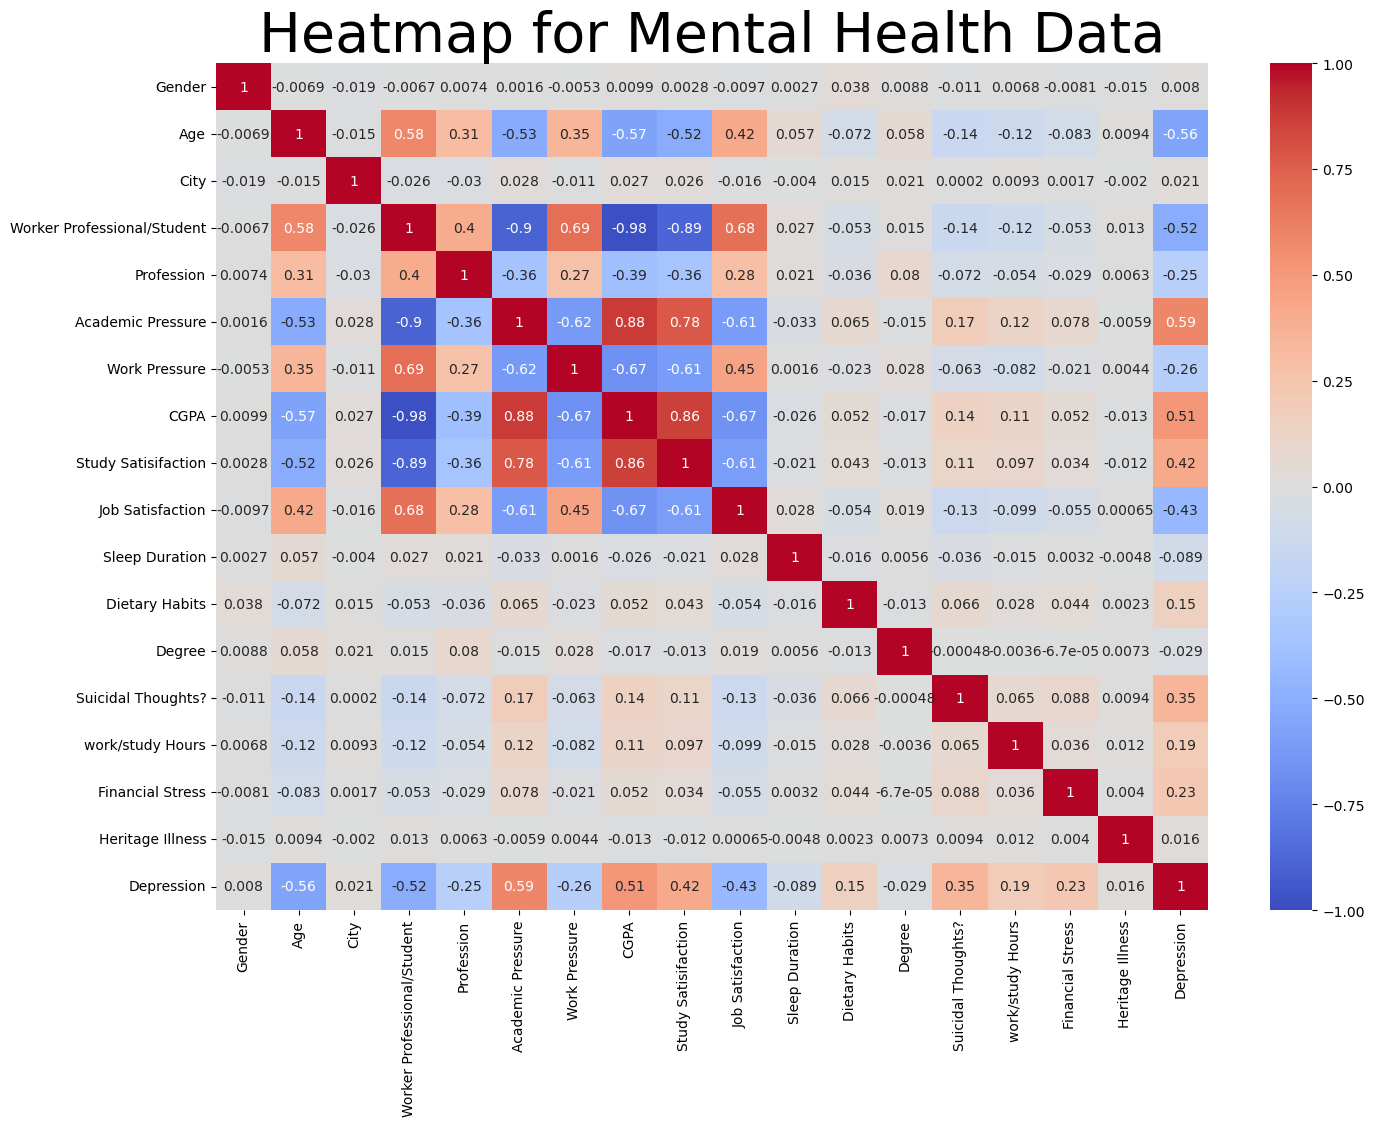

In [90]:
# a heatmap to see the correlation of all the features and pick the features according to its correlation 

plt.figure(figsize=(16,11))

sns.heatmap(new_df.corr(), annot=True, vmin=-1, vmax=1, cbar =True, cmap='coolwarm')

plt.title("Heatmap for Mental Health Data",fontsize=40)

plt.show()

# plt.savefig('Mental Health Data Heatmap.jpg',format='jpg')

<div>
    <center>
    <h3>
        Insights from the heatmap of <b> Mental Health </b> data
    </h3>
        <p>
            As you can see there is a lot happening in the data with the heatmap that we have, we are able to see the correlation between the features provided and compared it with other columns .
        </p>
            <p>
                <center>
                I feel like there is a lot happening in this correlated data.
                    Apart from our Main predictor <u><i>Depression</i></u>
                    we also have other correlatio features between other independent variables which are dependent on other independent variables, lets say for example;
                </center> 
            </p>
   </center>
    <ol>In the column <u><i>Working Professional / Student</i></u> , 
        <p>here we can see that all the other columns  [  <u><i>Profession</i></u> ,<u><i>Academic Pressure</i></u> , <u><i>Work Pressure</i></u>,  <u><i>CGPA</i></u>,  <u><i>Study Satisfaction</i></u>, <u><i>Job Satisfaction </i></u>   ]  are having similar 
            strong correlation withis column so is vice-versa with other columns as well.
            In this Particular column you have a negative correlation if you are a having a profession other if you are a student then you will have a negative correlation 
        </p>
    </ol>

</div>

#### Lets Consider each column then 

For `CGPA` , if you are having a good `CGPA` it is observed from the data that
* You will most likely be having `positive` `study satisfaction` , But on the other side,
* we are also having the `Job Satisfaction` which has `negatively` affected because not everything is balanced if you over acheive a particular thing , 
either you will have a fault at some point , 
* here though people have done well in their `studies` their `job satisfaction` doesnt serve them right,
* but not to that extreme only a portion of the people say that we are satisfied in our `job` and `studies` both ,
* in majority of the cases we can see this trend where some people excell in their studies but end up doing a job that they dont like,

        * here the data says out of `100%` people whom we surveyed, almost above`60%` of the people says this irrespective of Gender.!

### Depression Trends

* Now focusing on the main task that is to find correlated features for our predictor `Depression`, 
* it Seems that the columns 
    * `Age` : -0.56, 
    * `Working Professional / Student` : -0.52,
    * `Profession` : -0.25,
    * `Academic Pressure` : 0.59, 
    * `Work Pressure` : -0.29,
    * `CGPA` : 0.51,
    * `Study Satisfaction` : 0.42 ,
    * `Job Satisfaction` : -0.43,
    * `Sleep Duration` : -0.089, 
        * the reason we take only the 1 col which has correlation features inbetween -0.1 & 0.1 is because only this particular his more closely related to the index gap -0.1 , which can be considered rest of the column features actually has th potential to provide us with uncertainity figures, just because they are less correlated
    * `Dietary Habits` : 0.15 ,
    * `Suicidal Thoughts?` : 0.35,
    * `Work/Study Hours` : 0.19 ,
    * `Financial Stress` : 0.23,

In [91]:
xy_df = new_df.copy()

xy_df.drop(columns=['Gender','City','Degree','Heritage Illness'], axis=1, inplace=True)

xy_df.head(5)

,Age,Worker Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisifaction,Job Satisfaction,Sleep Duration,Dietary Habits,Suicidal Thoughts?,work/study Hours,Financial Stress,Depression
0,49.0,1,0,0.0,5.0,0.00,0.0,2.0,2,0,0,1.0,2.0,0
1,26.0,1,1,0.0,4.0,0.00,0.0,3.0,0,2,1,7.0,3.0,1
2,33.0,0,2,5.0,0.0,8.97,2.0,0.0,1,0,1,3.0,1.0,1
3,22.0,1,1,0.0,5.0,0.00,0.0,1.0,0,1,1,10.0,1.0,1
4,30.0,1,3,0.0,1.0,0.00,0.0,1.0,1,2,1,9.0,4.0,0


# Splitting the data

#### Check for Duplicates

In [92]:
xy_df.duplicated().sum()

1092

#### Removing the Duplicates

In [93]:
xy_df.drop_duplicates(inplace=True)

#### Check for Duplicates

In [94]:
xy_df.duplicated().sum()

0

#### shape of the new Dataset

In [95]:
xy_df.shape

(139447, 14)

#### Number of deleted rows

In [96]:
140700 - 139447

1253

In [97]:
xy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139447 entries, 0 to 140699
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Age                          139447 non-null  float64
 1   Worker Professional/Student  139447 non-null  int32  
 2   Profession                   139447 non-null  int32  
 3   Academic Pressure            139447 non-null  float64
 4   Work Pressure                139447 non-null  float64
 5   CGPA                         139447 non-null  float64
 6   Study Satisifaction          139447 non-null  float64
 7   Job Satisfaction             139447 non-null  float64
 8   Sleep Duration               139447 non-null  int64  
 9   Dietary Habits               139447 non-null  int32  
 10  Suicidal Thoughts?           139447 non-null  int32  
 11  work/study Hours             139447 non-null  float64
 12  Financial Stress             139447 non-null  float64
 13  Depr

In [98]:
X = xy_df.iloc[:,:13]
X

,Age,Worker Professional/Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisifaction,Job Satisfaction,Sleep Duration,Dietary Habits,Suicidal Thoughts?,work/study Hours,Financial Stress
0,49.0,1,0,0.0,5.0,0.00,0.0,2.0,2,0,0,1.0,2.0
1,26.0,1,1,0.0,4.0,0.00,0.0,3.0,0,2,1,7.0,3.0
2,33.0,0,2,5.0,0.0,8.97,2.0,0.0,1,0,1,3.0,1.0
3,22.0,1,1,0.0,5.0,0.00,0.0,1.0,0,1,1,10.0,1.0
4,30.0,1,3,0.0,1.0,0.00,0.0,1.0,1,2,1,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,18.0,1,2,0.0,5.0,0.00,0.0,4.0,1,2,0,2.0,4.0
140696,41.0,1,15,0.0,5.0,0.00,0.0,4.0,1,1,1,6.0,5.0
140697,24.0,1,10,0.0,3.0,0.00,0.0,1.0,2,1,0,4.0,4.0
140698,49.0,1,9,0.0,5.0,0.00,0.0,2.0,1,1,1,10.0,1.0


In [99]:
y = xy_df['Depression']
y

0         0
1         1
2         1
3         1
4         0
         ..
140695    1
140696    0
140697    0
140698    0
140699    1
Name: Depression, Length: 139447, dtype: int64

### Split set

In [100]:
# splitting the dataset into training set and test set

x_train , x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=53)

In [101]:
# printing the dhape of the training and testing dataset

print(f"Training set : X->{x_train.shape}, y->{y_train.shape}")
print(f"Testing set : X->{x_test.shape}, y->{y_test.shape}")

Training set : X->(125502, 13), y->(125502,)
Testing set : X->(13945, 13), y->(13945,)


# Building a NN

In [102]:
print(len(x_train.columns))

13


### Initializing the model

In [103]:
# # my neural network 
# # sequential API

model = tf.keras.Sequential([
    tf.keras.Input(shape=(13,)),
    tf.keras.layers.Dense(128,activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


### compiling the model

In [104]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy',  tf.keras.metrics.Precision(name='precision')
#              tf.keras.metrics.Recall(name='recall'),
#              tf.keras.metrics.AUC(name='auc')
])

### model summary

In [117]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,525 (150.49 KB)

 Trainable params: 12,841 (50.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,684 (100.33 KB)

# Training the model

In [106]:
model.fit(x_train,y_train,
         validation_split=0.2,
         epochs=50,
         batch_size=100,
         verbose=1)

Epoch 1/50
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8187 - loss: 251.3791 - precision: 0.5054 - val_accuracy: 0.9207 - val_loss: 0.3769 - val_precision: 0.7880
Epoch 2/50
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9047 - loss: 0.3743 - precision: 0.7633 - val_accuracy: 0.9141 - val_loss: 0.2761 - val_precision: 0.7452
Epoch 3/50
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9102 - loss: 0.2996 - precision: 0.7655 - val_accuracy: 0.9267 - val_loss: 0.2363 - val_precision: 0.7611
Epoch 4/50
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9055 - loss: 0.3037 - precision: 0.7571 - val_accuracy: 0.9329 - val_loss: 0.2330 - val_precision: 0.8323
Epoch 5/50
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9103 - loss: 0.2904 - precision: 0.7759 - val_accuracy: 0.9357 - val_loss: 0.2276 - val_precision: 0.8234
Epoch 6/50
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9102 - loss: 0.2916 - precision: 0.7825 - val_accuracy: 0.91

1005/1005 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9101 - loss: 0.3219 - precision: 0.8032 - val_accuracy: 0.8847 - val_loss: 0.3504 - val_precision: 0.9545
Epoch 41/50
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9024 - loss: 0.3379 - precision: 0.7830 - val_accuracy: 0.9165 - val_loss: 0.2947 - val_precision: 0.7105
Epoch 42/50
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9070 - loss: 0.3192 - precision: 0.7582 - val_accuracy: 0.9245 - val_loss: 0.2891 - val_precision: 0.8946
Epoch 43/50
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8989 - loss: 0.3384 - precision: 0.7567 - val_accuracy: 0.9345 - val_loss: 0.2525 - val_precision: 0.8231
Epoch 44/50
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9083 - loss: 0.3199 - precision: 0.7836 - val_accuracy: 0.9277 - val_loss: 0.2741 - val_precision: 0.8701
Epoch 45/50
1005/1005 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9106 - loss: 0.3123 - precision: 0.7996 - val_accuracy: 0.8604 - val

# Validating the model

In [107]:
# valuation of the model
final_accuracy = model.evaluate(x_test,y_test)

print(f"Testing accuracy : {final_accuracy} ")

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9145 - loss: 0.3053 - precision: 0.8920
Testing accuracy : [0.302987664937973, 0.9152384400367737, 0.8925120830535889] 


# Model Tuning

### Building the model

In [108]:
# a custom neural network binary classifier model
# with the help of keras_tuner

def build_model(hp):
    model = tf.keras.Sequential()
    
    # First Dense Layer with tunable neurons
    model.add(tf.keras.Input(shape=(13,)))
    
    # Hidden Layer
    for i in range(hp.Int('No_of_Layers',min_value=1, max_value=6)):
        # tuning the layers in the model
        model.add(tf.keras.layers.Dense(units = hp.Int(f"units_{i}",
                                                       min_value=8,max_value=128,step=4),
                 #tuning the activation functions
                activation=hp.Choice(f"activation_{i}",values=['relu','leaky_relu','swish'])
                 ))
        
        # adding the dropout layer if incase it is overfitting
        if hp.Boolean(f"add_dropout_{i}"):
            model.add(tf.keras.layers.Dropout(rate=hp.Float(f"dropout_rate_{i}",
                                                            min_value=0.2,max_value=0.6,step=0.2)))
        
    
    # Output Layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    # Compile the Model
    model.compile(
        optimizer=hp.Choice('optimizer',values=['adam','sgd']),
        loss='binary_crossentropy',
        metrics=['accuracy','AUC']
    )
    return model


### Initializing the Tuner

In [109]:
# initializing the tuner
tuner = kt.Hyperband(build_model,
                    objective = 'val_accuracy',
                    max_epochs = 66,
                    factor=3,
                    directory = 'mentalhealth_best_model',
                    project_name = 'mental_health_tuning_folder_best_params')

### Searching or finding the best parameters for the model

In [110]:
# adding callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=3,
                                                 restore_best_weights=True)

In [111]:
# training the model
tuner.search(
    x_train, 
    y_train,
    epochs=30,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]  
)

Trial 90 Complete [00h 00m 46s]
val_accuracy: 0.9380502700805664

Best val_accuracy So Far: 0.9388868808746338
Total elapsed time: 01h 23m 25s


# Model Evaluation

In [112]:
# getting the best hyperparameters 
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)


{'No_of_Layers': 2, 'units_0': 68, 'activation_0': 'swish', 'add_dropout_0': False, 'optimizer': 'adam', 'units_1': 120, 'activation_1': 'swish', 'add_dropout_1': False, 'units_2': 52, 'activation_2': 'leaky_relu', 'add_dropout_2': False, 'units_3': 104, 'activation_3': 'leaky_relu', 'add_dropout_3': True, 'units_4': 108, 'activation_4': 'leaky_relu', 'add_dropout_4': False, 'units_5': 76, 'activation_5': 'swish', 'add_dropout_5': True, 'dropout_rate_0': 0.4, 'dropout_rate_4': 0.4, 'dropout_rate_1': 0.2, 'dropout_rate_2': 0.2, 'dropout_rate_3': 0.4, 'dropout_rate_5': 0.4, 'tuner/epochs': 66, 'tuner/initial_epoch': 22, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0048'}


In [113]:
# building and training the best model 
best_model = tuner.hypermodel.build(best_hps)

In [114]:
# callbacks
early_stopping1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=5)

In [115]:
# fitting the model
best_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=75,
    batch_size=128,
    verbose = 1,
)


Epoch 1/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9468 - accuracy: 0.9132 - loss: 0.2100 - val_AUC: 0.9703 - val_accuracy: 0.9339 - val_loss: 0.1655
Epoch 2/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9706 - accuracy: 0.9353 - loss: 0.1612 - val_AUC: 0.9715 - val_accuracy: 0.9379 - val_loss: 0.1568
Epoch 3/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9722 - accuracy: 0.9374 - loss: 0.1577 - val_AUC: 0.9722 - val_accuracy: 0.9380 - val_loss: 0.1552
Epoch 4/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9718 - accuracy: 0.9368 - loss: 0.1579 - val_AUC: 0.9723 - val_accuracy: 0.9359 - val_loss: 0.1605
Epoch 5/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9717 - accuracy: 0.9360 - loss: 0.1587 - val_AUC: 0.9712 - val_accuracy: 0.9378 - val_loss: 0.1566
Epoch 6/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9727 - accuracy: 0.9385 - loss: 0.1553 - val_AUC: 0.9718 - val_accuracy: 0.9369 - val_loss: 0.1591
Epoch 7/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 

785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9745 - accuracy: 0.9394 - loss: 0.1508 - val_AUC: 0.9714 - val_accuracy: 0.9377 - val_loss: 0.1568
Epoch 44/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9741 - accuracy: 0.9377 - loss: 0.1529 - val_AUC: 0.9714 - val_accuracy: 0.9379 - val_loss: 0.1565
Epoch 45/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9750 - accuracy: 0.9401 - loss: 0.1490 - val_AUC: 0.9715 - val_accuracy: 0.9377 - val_loss: 0.1563
Epoch 46/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9740 - accuracy: 0.9382 - loss: 0.1516 - val_AUC: 0.9715 - val_accuracy: 0.9376 - val_loss: 0.1569
Epoch 47/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9753 - accuracy: 0.9399 - loss: 0.1490 - val_AUC: 0.9713 - val_accuracy: 0.9371 - val_loss: 0.1567
Epoch 48/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9749 - accuracy: 0.9385 - loss: 0.1514 - val_AUC: 0.9716 - val_accuracy: 0.9376 - val_loss: 0.1565
Epoch 49/75
785/785 ━━━━━━━━━━━━━━━━━━━━ 2s 3m

# Predictive Analysis with best hyperparameters model

In [134]:
# valuation of the model
evaluation_02 = best_model.evaluate(x_test,y_test)

print(f"Testing accuracy : {evaluation_02} ")

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9709 - accuracy: 0.9319 - loss: 0.1642
Testing accuracy : [0.16128894686698914, 0.9347436428070068, 0.9713564515113831] 


In [118]:
y_predict = best_model.predict(x_test)

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [121]:
# converting the classes into categories of 0 and 1 from probabillities
y_predict_0_1 = (y_predict > 0.5).astype(int)

In [122]:
# printing the classification report
print(classification_report(y_test, y_predict_0_1))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11463
           1       0.82      0.81      0.82      2482

    accuracy                           0.93     13945
   macro avg       0.89      0.89      0.89     13945
weighted avg       0.93      0.93      0.93     13945



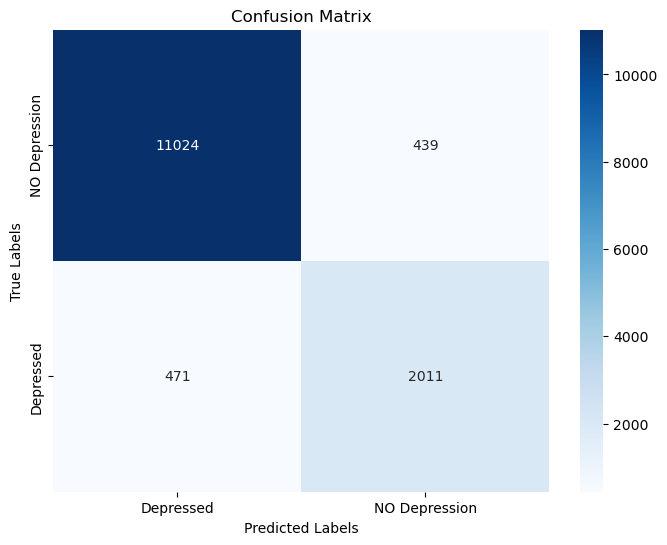

In [128]:
# Assuming y_test is your true labels and y_predict_classes is your predicted labels
conf_matrix = confusion_matrix(y_test, y_predict_0_1)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Depressed', 'NO Depression'], 
            yticklabels=['NO Depression', 'Depressed'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Predictive Analysis with Custom model

In [133]:
# valuation of the custom model
evaluation_03 = model.evaluate(x_test,y_test)

print(f"Testing accuracy : {evaluation_03} ")

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9145 - loss: 0.3053 - precision: 0.8920
Testing accuracy : [0.302987664937973, 0.9152384400367737, 0.8925120830535889] 


In [135]:
y_predict_model = model.predict(x_test)

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step


In [136]:
# converting the classes into categories of 0 and 1 from probabillities
y_predict_0_1_model = (y_predict_model > 0.5).astype(int)

In [137]:
# printing the classification report
print(classification_report(y_test, y_predict_0_1_model))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11463
           1       0.89      0.60      0.71      2482

    accuracy                           0.92     13945
   macro avg       0.91      0.79      0.83     13945
weighted avg       0.91      0.92      0.91     13945



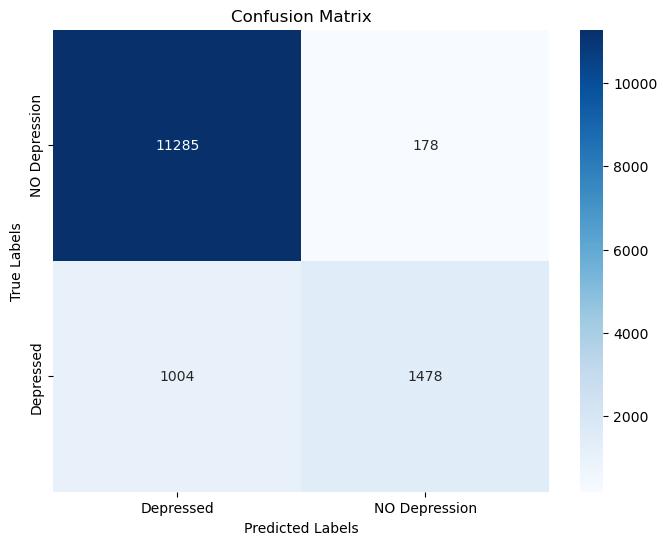

In [138]:
# Assuming y_test is your true labels and y_predict_classes is your predicted labels
conf_matrix = confusion_matrix(y_test, y_predict_0_1_model)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Depressed', 'NO Depression'], 
            yticklabels=['NO Depression', 'Depressed'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Exporting the Model

In [141]:
# Saving the custom model in keras format
model.save('Mental_Health_custom_model.keras')

In [142]:
# saving the best hyperparameters model in keras format
best_model.save('Mental_Health_best_param_model.keras')